In [16]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230721 entries, 0 to 42537
Data columns (total 50 columns):
id                            5 non-null object
member_id                     0 non-null float64
loan_amnt                     230716 non-null float64
funded_amnt                   230716 non-null float64
funded_amnt_inv               230716 non-null float64
term                          230716 non-null object
int_rate                      230716 non-null object
installment                   230716 non-null float64
grade                         230716 non-null object
sub_grade                     230716 non-null object
emp_title                     216353 non-null object
emp_length                    221717 non-null object
home_ownership                230716 non-null object
annual_inc                    230712 non-null float64
verification_status           230716 non-null object
issue_d                       230716 non-null object
loan_status                   230716 non-null 

In [3]:
#df1.info()

NameError: name 'df1' is not defined

In [4]:
filter1=df['addr_state']=='NE'
df1=df[filter1]
df2=df1.groupby('grade')['grade'].count()
df3=df1.groupby('grade')['grade'].count()/df2.sum()
df1['addr_state']
df3

grade
A    0.071429
B    0.071429
C    0.071429
D    0.500000
E    0.214286
F    0.071429
Name: grade, dtype: float64

In [ ]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df1=df.loc[termfilter]
#df2=df1.groupby('grade')['grade'].count()
#df3=df1.groupby('grade')['grade'].count()/df2.sum()
#df3

In [ ]:
from datetime import datetime, timedelta

#df['A'] = pd.to_datetime(df['last_pymnt_d'])
#df['A'].dtypes

In [ ]:
#df['B'] = pd.to_datetime(df['issue_d'])
#df['B'].dtypes

In [ ]:
#df['Difference'] = df['A'] - df['B']

In [ ]:
#datefilter=df['Difference']<timedelta(days=180)

In [ ]:
df['addr_state'].value_counts(normalize=True)

In [ ]:
a7=df.pivot_table(index='addr_state',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
a7['funded_percent']=(a7['funded_amnt']/sum(a7['funded_amnt'])).round(2)
#a7['combined']=a7['addr_state'].astype(str)+" "+a7['funded_percent'].astype(str)
a7

In [ ]:
#desred_decimals = 1
#a7['funded_percent_NEW'] = a7['funded_percent_NEW'].apply(lambda x: round(x,desred_decimals))

In [ ]:
a7['funded_percent_NEW']=a7['funded_percent']*100
a7

In [ ]:
a7=df.pivot_table(index='addr_state',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
a7['funded_percent']=(a7['funded_amnt']/sum(a7['funded_amnt'])).round(2)
c7=a7.reset_index()
c7=c7.head(-4)
d7=c7['addr_state']
b7=c7['funded_amnt']
print(list(d7))
print(list(b7))

In [ ]:
#c7['funded_percent']=c7['funded_amnt']/sum(c7['funded_amnt'])
#c7['funded_percent']=c7['funded_percent'].round(2)
#c7['combined']=c7['addr_state'].astype(str)+" "+c7['funded_percent'].astype(str) + a7['funded_percent_NEW'].astype(str)
#c7['combined']
#c7
#print(list(c7['combined']))

#names = c7['combined'].head(-10)


In [ ]:
#c7

In [ ]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=list(b7), label=names, alpha=.5)
plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1.5, hspace=2,
                    wspace=1)

plt.axis('off')
plt.title('Loans by State')
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()


In [31]:
gradefilter=df['grade']=='G'
df1=df[gradefilter]

In [32]:
#Charge Off Probability
Total=df1.groupby(['addr_state'])['funded_amnt'].count()
df1=df1[(df1.loan_status=='Charged Off')]
df2=df1.groupby(['addr_state'])['funded_amnt'].count()
df3=(df2/Total).round(2).dropna()
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['addr_state']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,addr_state,funded_amnt
34,SD,1.00
33,SC,0.50
16,LA,0.50
37,UT,0.43
28,OH,0.42
7,DC,0.40
9,FL,0.38
24,NJ,0.38
22,NC,0.38
3,AZ,0.37


In [19]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    #ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

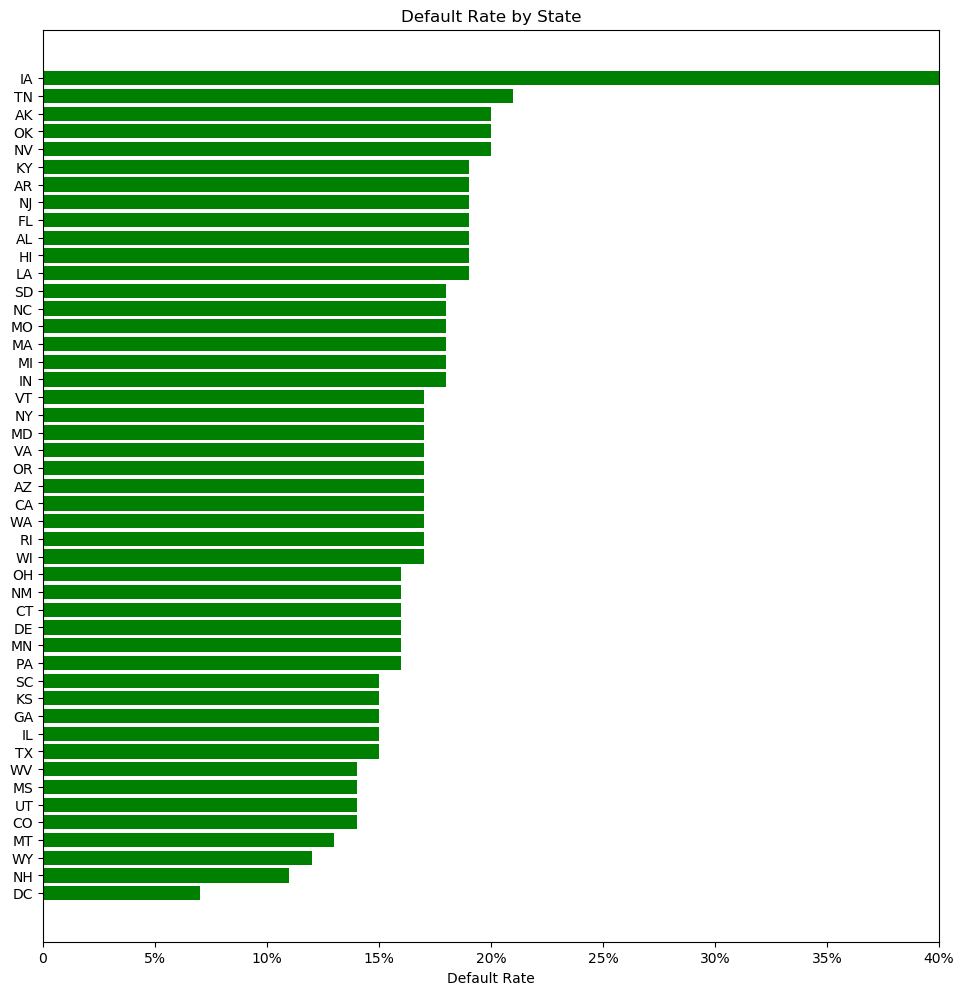

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by State')
ax.set_xlim(0,.40)
plt.subplots_adjust(top=2, bottom=.1, left=.1, right=1.5, hspace=2,
                    wspace=.5)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Default Rate by State')
plt.show()

In [ ]:
df['performance']=(df['total_pymnt']-df['collection_recovery_fee']) / (df['funded_amnt']) - 1

In [ ]:
df['addr_state'].fillna(0, inplace=True)
searchfor = ['IA','ID','DC','NH','WV','VT','KS','WY','CO','SC','MT','OR','CT','GA','IL','AK','TX','WA','WI']
statefilter = df['addr_state'].str.contains('|'.join(searchfor),na=False)
df1=df[statefilter]

In [ ]:
filter1 = df.addr_state =='NE'
df[filter1].iloc[:, 30:50]
